In [41]:
from TotalCalculation import *
from preprocessing import *
import os
from datetime import datetime as dt

In [42]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Chile\2024-07\2024-07-07')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558820311162298.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558821511812473.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558822712918731.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558823914049861.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558825115686028.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558826316562604.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558827517311164.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Chile\\2024-07\\2024-07-07\\638558828719040249.png', 'C:\\Users\\ASUS\\Documents\\NARIT_inte

In [43]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=-4)) for t in filetime]
print(decimal)

[13.008611111111112, 13.041944444444445, 13.075277777777778, 13.108611111111111, 13.141944444444444, 13.175277777777778, 13.20861111111111, 13.241944444444444, 13.275555555555556, 13.30888888888889, 13.342222222222222, 13.375555555555556, 13.408888888888889, 13.442222222222222, 13.475555555555555, 13.508888888888889, 13.542222222222222, 13.575833333333334, 13.609166666666667, 13.6425, 13.675833333333333, 13.709166666666667, 13.7425, 13.775833333333335, 13.809166666666668, 13.842500000000001, 13.876111111111111, 13.909444444444444, 13.942777777777778, 13.976111111111111, 14.009444444444444, 14.042777777777777, 14.07611111111111, 14.109444444444444, 14.142777777777777, 14.192777777777778, 14.22638888888889, 14.259722222222223, 14.293055555555556, 14.32638888888889, 14.359722222222222, 14.393055555555556, 14.426388888888889, 14.459722222222222, 14.493055555555555, 14.52638888888889, 14.56, 14.593333333333334, 14.626666666666667, 14.66, 14.693333333333333, 14.726666666666667, 14.76, 14.793

In [44]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=-4)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [45]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[-60.16776,-70.80516],Time_zone=-4,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

9.897225356600108 15.69419930687661


In [46]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [47]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [48]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset,time_zone=-4)

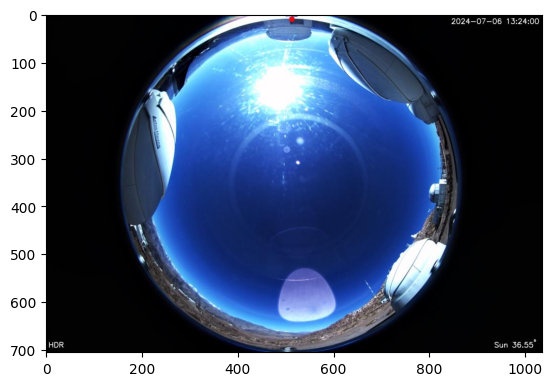

In [49]:
import cv2
from matplotlib import pyplot as plt
im = 12
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [50]:
im = 15
Day_filetime = [extract_name(d) for d in Day_filename]
final = thresholding().RBratiosingle(input=images[im],filename=Day_filetime[im],sunrise=sunrise,sunset=sunset)